## Imports

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.optimizers import Adam
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D, GlobalAveragePooling2D
from keras.layers.advanced_activations import LeakyReLU 
from keras.preprocessing.image import ImageDataGenerator

## Clean Data

In [17]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

#### Visualize Data

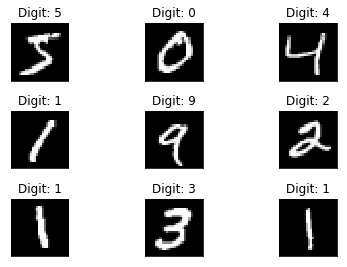

In [18]:
fig = plt.figure()
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.tight_layout()
    plt.imshow(X_train[i], cmap='gray', interpolation='none')
    plt.title("Digit: {}".format(y_train[i]))
    plt.xticks([])
    plt.yticks([])

Reshape:

In [19]:
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train/=255
X_test/=255

Encode output:

In [22]:
num_of_classes = 10
Y_train = np_utils.to_categorical(y_train, num_of_classes)
Y_test = np_utils.to_categorical(y_test, num_of_classes)

## Generate Model

In [23]:
model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=(28,28,1)))
model.add(BatchNormalization(axis=-1))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(BatchNormalization(axis=-1))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,(3, 3)))
model.add(BatchNormalization(axis=-1))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(BatchNormalization(axis=-1))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

# Fully connected layer
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(10))

model.add(Activation('softmax'))

In [35]:
model.compile(
    loss='categorical_crossentropy', 
    optimizer=Adam(), 
    metrics=['accuracy', 'mse', 'mae', 'mape', 'cosine']
)

Augment data:

In [36]:
gen = ImageDataGenerator(
    rotation_range=8, 
    width_shift_range=0.08, 
    shear_range=0.3,
    height_shift_range=0.08, 
    zoom_range=0.08
)

test_gen = ImageDataGenerator()

Create batches of data:

In [37]:
train_generator = gen.flow(X_train, Y_train, batch_size=64)
test_generator = test_gen.flow(X_test, Y_test, batch_size=64)

#### Train

In [38]:
history = model.fit_generator(train_generator, steps_per_epoch=60000//64, epochs=5, 
                    validation_data=test_generator, validation_steps=10000//64)

Epoch 1/5
937/937 [==============================] - 304s 324ms/step - loss: 0.0224 - acc: 0.9931 - mean_squared_error: 0.0011 - mean_absolute_error: 0.0021 - mean_absolute_percentage_error: 1034626.6728 - cosine_proximity: -0.9939 - val_loss: 0.0174 - val_acc: 0.9942 - val_mean_squared_error: 8.7779e-04 - val_mean_absolute_error: 0.0016 - val_mean_absolute_percentage_error: 784325.6443 - val_cosine_proximity: -0.9951
Epoch 2/5
937/937 [==============================] - 289s 309ms/step - loss: 0.0213 - acc: 0.9930 - mean_squared_error: 0.0011 - mean_absolute_error: 0.0020 - mean_absolute_percentage_error: 979342.8402 - cosine_proximity: -0.9942 - val_loss: 0.0182 - val_acc: 0.9945 - val_mean_squared_error: 8.6173e-04 - val_mean_absolute_error: 0.0015 - val_mean_absolute_percentage_error: 755392.0864 - val_cosine_proximity: -0.9953
Epoch 3/5
937/937 [==============================] - 291s 311ms/step - loss: 0.0197 - acc: 0.9938 - mean_squared_error: 9.6269e-04 - mean_absolute_error: 0.0

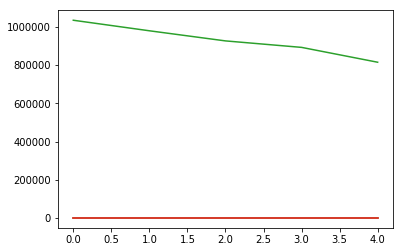

In [43]:
plt.plot(history.history['mean_squared_error'])
plt.plot(history.history['mean_absolute_error'])
plt.plot(history.history['mean_absolute_percentage_error'])
plt.plot(history.history['cosine_proximity'])


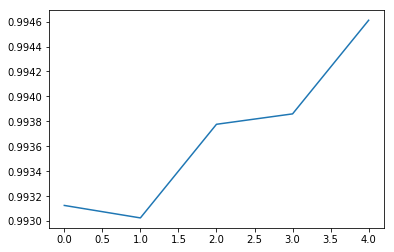

In [44]:
plt.plot(history.history['acc'])
